<a href="https://colab.research.google.com/github/tudorcap/cap-comp215/blob/main/COMP215_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 by Tudor Bita - North Van Translink Visualization**
Graphs using visual location, coordinates, and time apart to find the shortest path between bus stops in North Vancouver
.


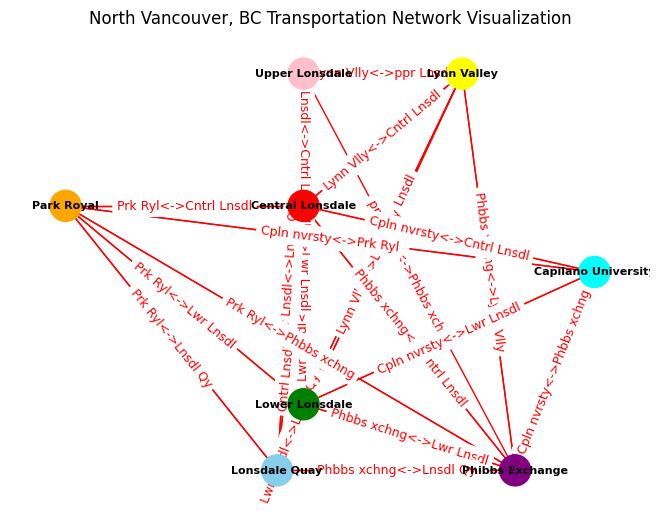

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing bus stops and routes in North Vancouver, BC
# Places only connect if one bus directly connects the two locations
# 1st attempt with manual positions of nodes
bus_stops = {
    'Lonsdale Quay': {'Lower Lonsdale', 'Central Lonsdale','Upper Lonsdale','Park Royal','Phibbs Exchange', 'Lynn Valley'},
    'Central Lonsdale': {'Lonsdale Quay', 'Lynn Valley', 'Lower Lonsdale', 'Upper Lonsdale','Capilano University','Park Royal','Phibbs Exchange'},
    'Lower Lonsdale': {'Lonsdale Quay', 'Central Lonsdale','Upper Lonsdale','Capilano University', 'Lynn Valley','Phibbs Exchange','Park Royal'},
    'Lynn Valley': {'Central Lonsdale', 'Phibbs Exchange','Upper Lonsdale','Lower Lonsdale','Lonsdale Quay'},
    'Upper Lonsdale': {'Central Lonsdale', 'Phibbs Exchange','Lower Lonsdale','Lonsdale Quay'},
    'Phibbs Exchange': {'Lynn Valley', 'Park Royal','Lonsdale Quay','Lower Lonsdale','Central Lonsdale','Capilano University'},
    'Park Royal': {'Lonsdale Quay', 'Phibbs Exchange','Central Lonsdale','Lower Lonsdale','Capilano University'},
    'Capilano University': {'Phibbs Exchange', 'Central Lonsdale', 'Lower Lonsdale', 'Park Royal'},
}

# Create a graph
# Using a directed graph to ensure nodes connect properly (personal choice)
bus_stop_map = nx.DiGraph()

# Add nodes representing bus stops
for stop in bus_stops.keys():
    bus_stop_map.add_node(stop)

# Add edges representing bus routes
for stop, connections in bus_stops.items():
    for connection in connections:
        bus_stop_map.add_edge(stop, connection)

# Manually specify positions for nodes
#Literally looked at a map a guestimated the positions
node_positions = {
    'Lonsdale Quay': (3, 0),
    'Central Lonsdale': (4, 4),
    'Lower Lonsdale': (4, 1),
    'Lynn Valley': (10, 6),
    'Upper Lonsdale': (4, 6),
    'Phibbs Exchange': (12, 0),
    'Park Royal': (-5,4),
    'Capilano University': (15, 3)

}

nx.set_node_attributes(bus_stop_map, node_positions, 'pos')

# Draw the graph
pos = nx.get_node_attributes(bus_stop_map, 'pos')
nx.draw(bus_stop_map, pos, with_labels=True, node_size=500, node_color=['skyblue', 'red', 'green', 'yellow','pink','purple','orange','cyan'], font_size=8, font_weight='bold', edge_color='red', arrows=False)

#In order to fit the names of the bus stops into the edge labels, remove the vowels.
vowels = "aeiouAEIOU"

edge_labels= {}

for u, v in bus_stop_map.edges():
  short_string = ""
  short_string2 = ""
  for char in u:
    if char not in vowels:
      short_string  += char
  for char in v:
    if char not in vowels:
      short_string2  += char
  edge_labels[u, v] = short_string + '<->' + short_string2


nx.draw_networkx_edge_labels(bus_stop_map, pos, edge_labels=edge_labels, font_color='red', font_size=9,)

# Display the graph
plt.title('North Vancouver, BC Transportation Network Visualization')
plt.show()



# North Vancouver, BC Transportation Network Visualization.

As a frequent bus user I decided to create a graph of the bus system in North Vancouver. This graph depicts where in North Vancouver one could go utilizing only one bus. For Ex. one would stop at Lonsdale Quay travelling from Park Royal to Phibbs Exchange but would remain on the same bus.

In [ ]:
# Find the shortest path between two bus stops using the manually placed positions of bus stops
source_stop = input('What bus stop are you at?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) ')
target_stop = input('What are you trying to go?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) ')
shortest_path = nx.shortest_path(bus_stop_map, source_stop, target_stop)

print(f'Shortest path from {source_stop} to {target_stop}: {shortest_path}')

What bus stop are you at?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) Capilano University
What are you trying to go?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) Park Royal
Shortest path from Capilano University to Park Royal: ['Capilano University', 'Park Royal']


The positions of the bus stops were estimated by me using the visual location on Google Maps without proper distance calculations in mind. Utilizing the shortest_path() function won't always produce what we would know as the true shortest path. In order to get accurate shortest_path() results the positioning of the bus stop nodes would have to be based on the distance in km between the bus stops or the time it takes to travel from stop to stop due to rapid buses being in consideration.

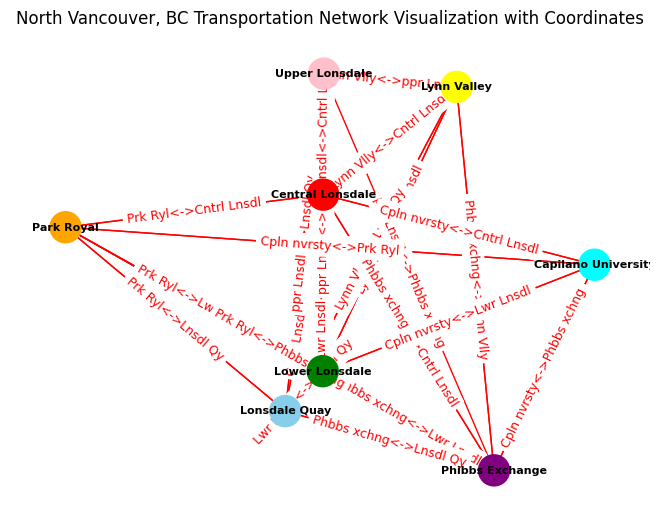

In [ ]:
#2nd attempt with coordinates as positions of nodes
#used ChatGPT to find the actual coordinates of each respective location
node_positions = {
    'Lonsdale Quay': (-123.0818, 49.3104),
    'Central Lonsdale': (-123.0722, 49.3283),
    'Lower Lonsdale': (-123.0723, 49.3137),
    'Lynn Valley': (-123.0383, 49.3372),
    'Upper Lonsdale': (-123.0720, 49.3383),
    'Phibbs Exchange': (-123.0288, 49.3055),
    'Park Royal': (-123.1376, 49.3256),
    'Capilano University': (-123.0033, 49.3225)
}

nx.set_node_attributes(bus_stop_map, node_positions, 'pos')

# Draw the graph
pos = nx.get_node_attributes(bus_stop_map, 'pos')
nx.draw(bus_stop_map, pos, with_labels=True, node_size=500, node_color=['skyblue', 'red', 'green', 'yellow','pink','purple','orange','cyan'], font_size=8, font_weight='bold', edge_color='red', arrows=False)

#In order to fit the names of the bus stops into the edge labels, remove the vowels.
vowels = "aeiouAEIOU"

edge_labels= {}

for u, v in bus_stop_map.edges():
  short_string = ""
  short_string2 = ""
  for char in u:
    if char not in vowels:
      short_string  += char
  for char in v:
    if char not in vowels:
      short_string2  += char
  edge_labels[u, v] = short_string + '<->' + short_string2


nx.draw_networkx_edge_labels(bus_stop_map, pos, edge_labels=edge_labels, font_color='red', font_size=9,)

# Display the graph
plt.title('North Vancouver, BC Transportation Network Visualization with Coordinates')
plt.show()

In [ ]:
# Find the shortest path between two bus stops using the manually placed positions of bus stops
source_stop = input('What bus stop are you at?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) ')
target_stop = input('What are you trying to go?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) ')
shortest_path = nx.shortest_path(bus_stop_map, source_stop, target_stop)

print(f'Shortest path from {source_stop} to {target_stop}: {shortest_path}')

What bus stop are you at?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) Park Royal
What are you trying to go?(Lonsdale Quay,Central Lonsdale,Lower Lonsdale,Lynn Valley,Upper Lonsdale,Phibbs Exchange,Park Royal,Capilano University) Phibbs Exchange
Shortest path from Park Royal to Phibbs Exchange: ['Park Royal', 'Phibbs Exchange']


#North Vancouver, BC Transportation Network Visualization with Coordinates
Using the positions of the nodes based on actual coordinates of the bus stops, the North Vancouver, BC Transportation Network Visualization looks slighlty better. The map aspect of this graph is very similar but using the shortest_path() function should now be more accurate in terms of distance using straight lines. However, many buses don't follow a straight line in order to get to their next stop.  The solution to this oversight would be to map out every path for every bus to see the actual distance travelled and find the true shortest path.


The other theory would be to utilize time as a form of distance. Calculate the average time it takes for each bus to make it to each stop and use those numbers as the positions of the bus stops. This would result in the map aspect of the graph to completely change into something unreliable but would cause the shortest_path() function to return the quickest path from one stop to another.

Excluding Google Maps' ability to find you the shortest, quickest, most scenic path your heart can desire, I found a website that is closer in line to what a well more developed version of my code would look like https://moovitapp.com/index/en/dir/Capilano_University-stop_8085465-site_151978449-145

In [ ]:
#3rd attempt with avg time apart as position of nodes